# ML

In [3]:
import seaborn as sns

iris = sns.load_dataset("iris")

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# https://stackoverflow.com/questions/36622237/jupyter-notebook-inline-plots-as-svg
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

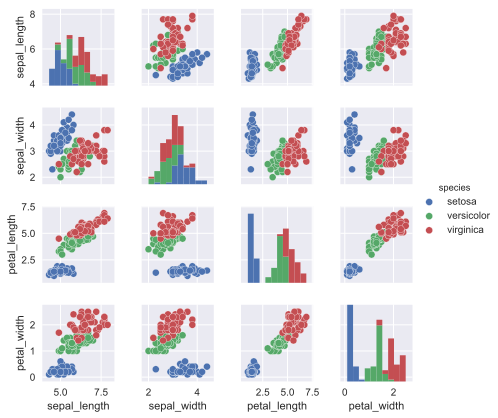

In [9]:
%matplotlib inline

import seaborn as sns
sns.set()

sns.pairplot(iris, hue="species", size=1.5)

In [38]:
X_iris = iris.drop("species", axis=1)
y_iris = iris["species"]

In [39]:
X_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [40]:
y_iris.head(3)

0    setosa
1    setosa
2    setosa
Name: species, dtype: object

In [19]:
X_iris.shape

(150, 4)

In [41]:
y_iris.shape

(150,)

## Supervised learning with SLR

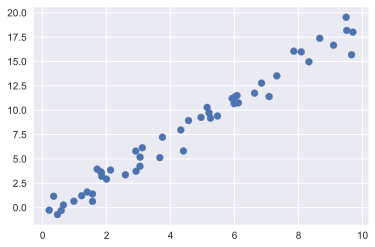

In [22]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [26]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
X = x[:, np.newaxis]
X[:3]

array([[3.74540119],
       [9.50714306],
       [7.31993942]])

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model.coef_

array([1.9776566])

In [32]:
model.intercept_

-0.9033107255311164

In [34]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

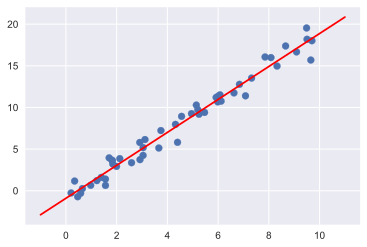

In [36]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red")

## Gaussian Naive Bayes

In [43]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [44]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

... well that was effective.

## PCA

In [47]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)


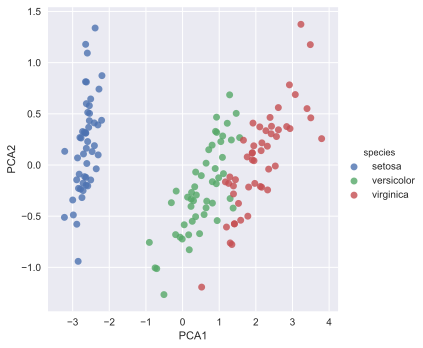

In [48]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue="species", data=iris, fit_reg=False)

## Clustering

In [ ]:
from sklearn.mixture import GMM  # looks like this is targeted for deprication in  0.2

model = GMM(n_components=3, covariance_type="full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)


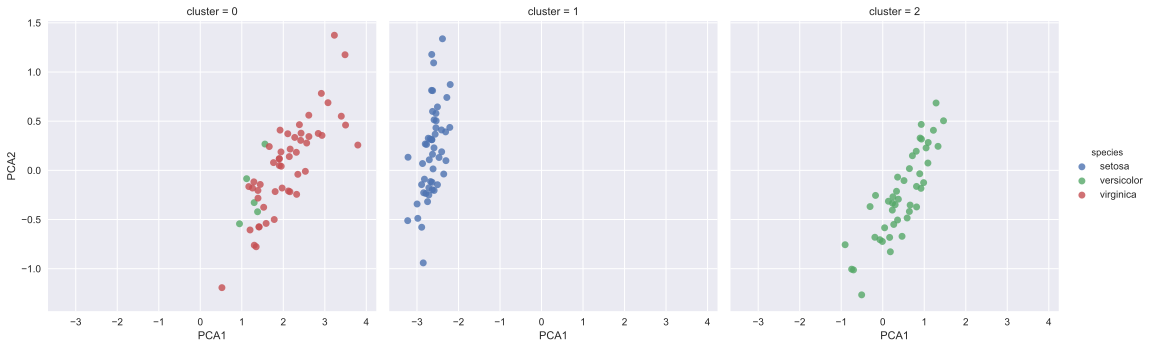

In [51]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue="species", col="cluster", fit_reg=False)

## Exploring handwritten digits

In [54]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

1,797 samples consisting of 8x8 grid of pixels.

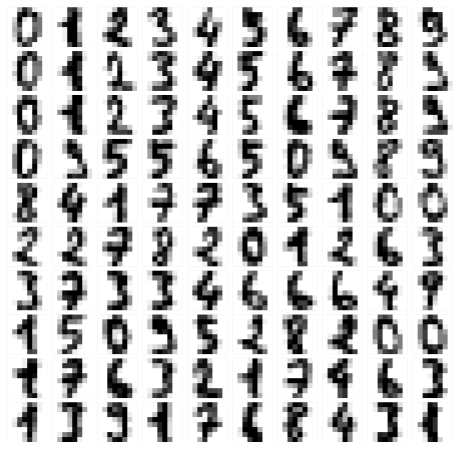

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")


Treat each pixel as a feature...

In [60]:
len(digits.images)

1797

In [62]:
data = digits.images[0]
data

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

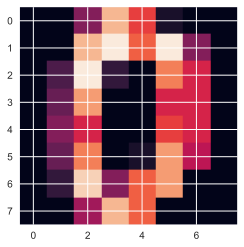

In [72]:
from matplotlib import pyplot as plt

plt.imshow(data)
plt.show()

Dimensions are reduced to 2 using an unsupervised method.

In [73]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


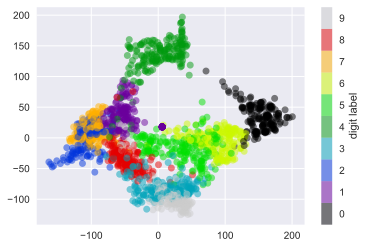

In [74]:
plt.scatter(
    data_projected[:,0],
    data_projected[:,1],
    c=digits.target,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("spectral", 10),
)

plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

In [78]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [79]:
y.shape

(1797,)

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [81]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

Text(92.68,0.5,'true value')

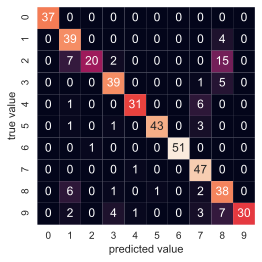

In [83]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")


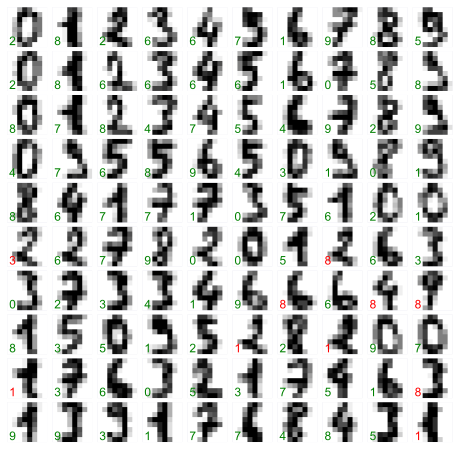

In [84]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color="green" if (ytest[i] == y_model[i]) else "red")

# hmmm... 

## Model validation the wrong way